## Assignment 2

* The second assignemt consists of implementing a linear regression insurance prices.
* It uses a free access dataset.
    * Start by using numerical attributes only.

## Things to do:

* Split the data in train and test.
* Visualize the scatter plot of the variables `age` and `charges` and deduce that there is a linear dependency for a fixed number of children.
* For instances with `smoker=="no"` use the sci-kit learn built-in libraries to make a linear fit of the `charges` feature as a function of the `age` feature with the SGD algorithm.
* Show the scatter plot of the two variables and the resulting straight line.
* Repeat the calculation with the BGD and Mini-BGD algorithms.
* Try to reproduce the plot with the evolution of the fit parameters in different iterations for the SGD.
* Now consider all the numerical features in the database (`age`, `bmi` and `children`) to make a multidimensional linear fit. Scale them, otherwise you can run into trouble.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from six.moves import urllib
urllib.request.urlretrieve('https://cernbox.cern.ch/index.php/s/3yYin0pO0S4A6VD/download','./data/insurance.csv')

('./data/insurance.csv', <http.client.HTTPMessage at 0x1083e5e20>)

### Convert the data into a Pandas Data Frame

In [5]:
df = pd.read_csv('./data/insurance.csv',sep=',')

In [6]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Separate the data sets

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [13]:
train.head(10)

,age,sex,bmi,children,smoker,region,charges
910,22,male,28.310,1,no,northwest,2639.04290
628,58,male,38.000,0,no,southwest,11365.95200
436,22,male,31.730,0,no,northeast,2254.79670
1029,37,female,17.290,2,no,northeast,6877.98010
228,41,female,31.635,1,no,northeast,7358.17565
1014,38,female,27.600,0,no,southwest,5383.53600
1129,19,female,18.600,0,no,southwest,1728.89700
198,51,female,18.050,0,no,northwest,9644.25250
1263,43,female,29.900,1,no,southwest,7337.74800
1292,21,male,23.210,0,no,southeast,1515.34490


In [14]:
test.head(10)

,age,sex,bmi,children,smoker,region,charges
525,18,female,33.880,0,no,southeast,11482.63485
878,41,male,28.800,1,no,southwest,6282.23500
1031,55,female,35.200,0,yes,southeast,44423.80300
1290,38,female,19.950,2,no,northeast,7133.90250
806,40,female,41.420,1,no,northwest,28476.73499
1310,42,male,26.315,1,no,northwest,6940.90985
712,43,female,30.685,2,no,northwest,8310.83915
360,48,female,32.300,2,no,northeast,10043.24900
210,20,male,33.000,1,no,southwest,1980.07000
272,41,male,37.050,2,no,northwest,7265.70250


# Scale the data

In [94]:
from sklearn.preprocessing import StandardScaler

scaler       = StandardScaler()
train_non_sc = train.drop(["region", "sex", "smoker"], axis=1)
train_sc_np  = scaler.fit_transform(train_non_sc)
train_sc     = pd.DataFrame(train_sc_np, columns=train_non_sc.columns, index=train_non_sc.index)

test_non_sc  = test.drop(["region", "sex", "smoker"], axis=1)
test_sc_np   = scaler.transform(test_non_sc)
test_sc      = pd.DataFrame(test_sc_np, columns=test_non_sc.columns, index=test_non_sc.index)

# Now we add the columns 
train_sc["region"] = train["region"]
train_sc["sex"] = train["sex"]
train_sc["smoker"] = train["smoker"]

test_sc["region"] = test["region"]
test_sc["sex"] = test["sex"]
test_sc["smoker"] = test["smoker"]


# Scatter Plot of `age` and `charges`

In [95]:
train_smokers = train_sc[train_sc["smoker"] == "yes"]
train_non_smokers = train_sc[train_sc["smoker"] == "no"]

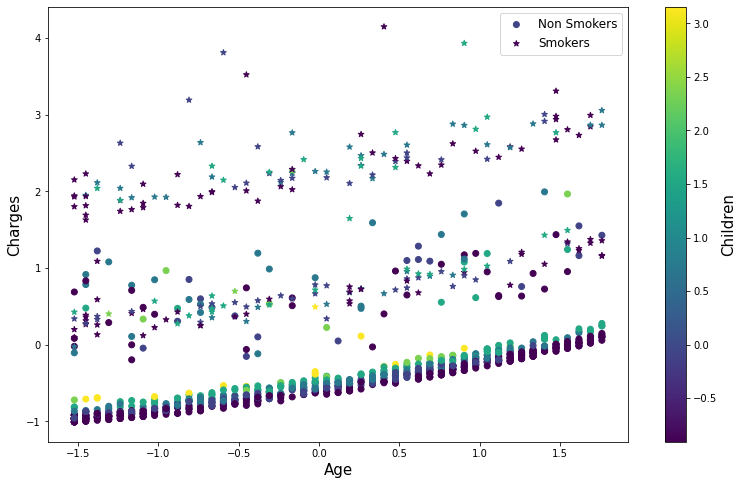

In [96]:
fig = plt.figure(figsize=(13,8))


plt.scatter(train_non_smokers.age, train_non_smokers.charges, 
            c=train_non_smokers.children, cmap='viridis', label="Non Smokers");

plt.scatter(train_smokers.age, train_smokers.charges, 
            c=train_smokers.children, cmap='viridis',marker="*", label="Smokers");

cbar = plt.colorbar();

cbar.ax.set_ylabel("Children", fontsize=15);
plt.xlabel("Age", fontsize=(15));
plt.ylabel("Charges", fontsize=(15));

plt.legend(fontsize=12);


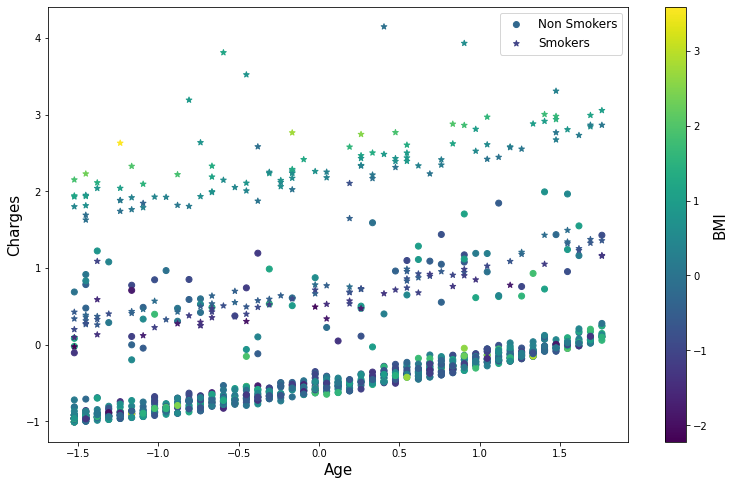

In [97]:
fig = plt.figure(figsize=(13,8))

plt.scatter(train_non_smokers.age, train_non_smokers.charges, 
            c=train_non_smokers.bmi, cmap='viridis', label="Non Smokers");

plt.scatter(train_smokers.age, train_smokers.charges, 
            c=train_smokers.bmi, cmap='viridis',marker="*", label="Smokers");

cbar = plt.colorbar();

cbar.ax.set_ylabel("BMI", fontsize=15);
plt.xlabel("Age", fontsize=(15));
plt.ylabel("Charges", fontsize=(15));

plt.legend(fontsize=12);

# Linear Regression with SGD

We get rid of the smokers as this would erase one (and a half) of the three clouds we have in our `age` vs. `charges` scatter plot.

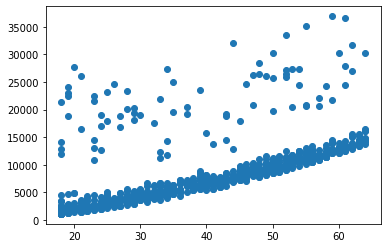

In [86]:
plt.scatter(train_non_smokers.age, train_non_smokers.charges);